In [1]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import re


In [2]:
path_inception = "inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

ukuran = (128,128,3)
t_size = (128,128)
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = path_inception

pre_trained_model = InceptionV3(input_shape=ukuran, include_top=False,weights=None)



pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
  # Your Code Here
  layer.trainable=False  
  
# Print the model summary
pre_trained_model.summary()


Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 63, 63, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 63, 63, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [3]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output


last layer output shape:  (None, 6, 6, 768)


In [4]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.97):
      print("\nReached 97.0% accuracy so cancelling training!")
      self.model.stop_training = True

      

In [5]:
from tensorflow.keras.optimizers import RMSprop,Adam

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (50, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = Adam(),
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

model.summary()



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 63, 63, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 63, 63, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [6]:
# Define our example directories and files
train_dir = './batik-group/train'
validation_dir = './batik-group/validation'
test_dir = './batik-group/test'


In [7]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
                                  rescale=1./255,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  shear_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1./255,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  shear_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=20,
                                                    class_mode='categorical',
                                                   target_size=t_size)     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  validation_datagen.flow_from_directory( validation_dir,
                                                   batch_size=20,
                                                    class_mode='categorical',
                                                   target_size=t_size)

# Expected Output:
# Found 1027 images belonging to 2 classes.
# Found 256 images belonging to 2 classes.

Found 150 images belonging to 50 classes.
Found 100 images belonging to 50 classes.


In [8]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 97% accuracy

callbacks =  myCallback()
history = model.fit(train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 3,
            validation_steps = 50,
            verbose = 2,
            callbacks=[callbacks])
           

Epoch 1/3
100/100 - 86s - loss: 1.2038 - acc: 0.7957 - val_loss: 0.2682 - val_acc: 0.9260
Epoch 2/3
100/100 - 84s - loss: 0.1045 - acc: 0.9695 - val_loss: 0.0772 - val_acc: 0.9720
Epoch 3/3

Reached 97.0% accuracy so cancelling training!
100/100 - 84s - loss: 0.0351 - acc: 0.9894 - val_loss: 0.0825 - val_acc: 0.9750


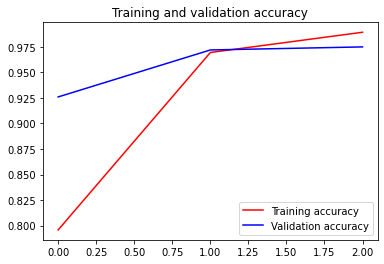

<Figure size 432x288 with 0 Axes>

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [10]:
model.save('recognize-batik-weight-inception_v3.h5')

In [11]:
kamus = dict({0: 'm-1', 1: 'm-2',
              2: 'm-3', 3: 'm-4',
              4: 'm-5', 5: 'm-6',
              6: 'm-7', 7: 'm-8',
              8: 'm-9', 9: 'm-10',
              10: 'm-11',11: 'm-12',
              12: 'm-13',13: 'm-14',
              14: 'm-15',15: 'm-16',
              16: 'm-17',17: 'm-18',
              18: 'm-19',19: 'm-20',
              
              20: 'm-21', 21: 'm-22',
              22: 'm-23', 23: 'm-24',
              24: 'm-25', 25: 'm-26',
              26: 'm-27', 27: 'm-28',
              28: 'm-29', 29: 'm-30',
              30: 'm-31', 31: 'm-32',
              32: 'm-33', 33: 'm-34',
              34: 'm-35', 35: 'm-36',
              36: 'm-37', 37: 'm-38',
              38: 'm-39', 39: 'm-40',
               
              40: 'm-41', 41: 'm-42',
              42: 'm-43', 43: 'm-44',
              44: 'm-45', 45: 'm-46',
              46: 'm-47', 47: 'm-48',
              48: 'm-49', 49: 'm-50'})


In [12]:
def atof(text):
    try:
        retval = float(text)
    except ValueError:
        retval = text
    return retval

def natural_keys(text):
    return [ atof(c) for c in re.split(r'[+-_]?([0-9]+(?:[.][0-9]*)?|[.][0-9]+)', text) ]

In [1]:
from tensorflow.keras.preprocessing import image
import numpy as np


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(128, 128))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


In [14]:
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(test_dir):
    for file in f:
        files.append(os.path.join(r, file))

files.sort(key=natural_keys)        


In [15]:
hitung_true=0
hitung_false=0
for a in range (50):
    new_image = load_image(files[a])
    pred = model.predict(new_image)
    hasil_pred = np.argmax(pred)
    print ("True value      : ",kamus[a])
    print ("Predicted Value : ",kamus[hasil_pred])
    
    if a==hasil_pred:
        hitung_true=hitung_true+1
    else:
        hitung_false=hitung_false+1
    print ()
    


True value      :  m-1
Predicted Value :  m-1

True value      :  m-2
Predicted Value :  m-12

True value      :  m-3
Predicted Value :  m-23

True value      :  m-4
Predicted Value :  m-34

True value      :  m-5
Predicted Value :  m-45

True value      :  m-6
Predicted Value :  m-47

True value      :  m-7
Predicted Value :  m-48

True value      :  m-8
Predicted Value :  m-49

True value      :  m-9
Predicted Value :  m-50

True value      :  m-10
Predicted Value :  m-2

True value      :  m-11
Predicted Value :  m-3

True value      :  m-12
Predicted Value :  m-4

True value      :  m-13
Predicted Value :  m-5

True value      :  m-14
Predicted Value :  m-6

True value      :  m-15
Predicted Value :  m-7

True value      :  m-16
Predicted Value :  m-8

True value      :  m-17
Predicted Value :  m-9

True value      :  m-18
Predicted Value :  m-10

True value      :  m-19
Predicted Value :  m-11

True value      :  m-20
Predicted Value :  m-13

True value      :  m-21
Predicted Valu

In [16]:
print("Total True predicted: ",hitung_true)    
print("Total False predicted: ",hitung_false)

Total True predicted:  1
Total False predicted:  49
